In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("../data/medical/medical_examination.csv", index_col="id")
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [180]:
# Add 'overweight' column
bmi = df['weight'] / (df["height"] / 100) ** 2
df['overweight'] = (bmi > 25).astype("int8")
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [181]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
unique_cholesterol = df["cholesterol"].unique()
unique_gluc = df["gluc"].unique()
print(unique_cholesterol, unique_gluc)

[1 3 2] [1 2 3]


In [182]:
for n in unique_cholesterol:
    for col in ("cholesterol", "gluc"):
        df[col].replace(n, 0 if n == 1 else 1, inplace=True)

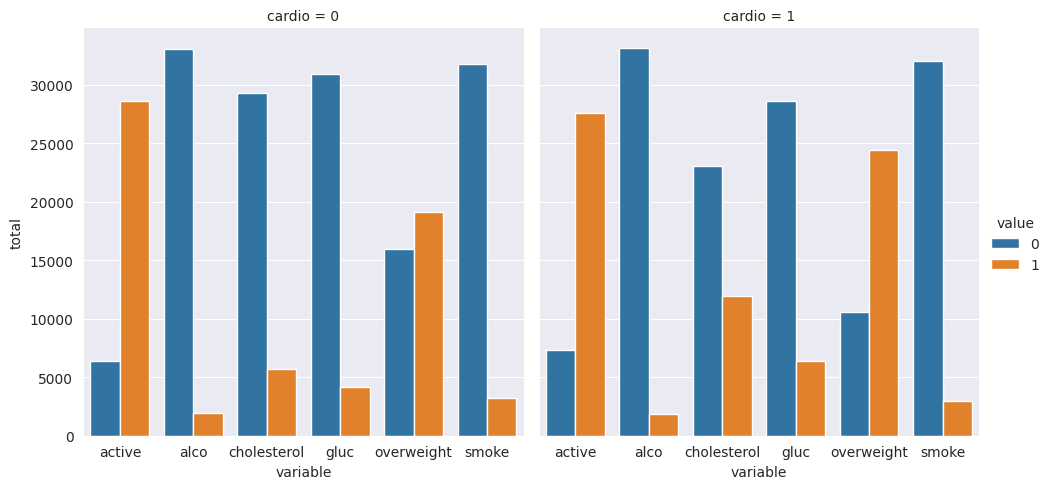

In [183]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df.melt(id_vars=["cardio"], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    # print(df_cat)

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

    # df_cat_cardio_0 = df_cat[df_cat["cardio"] == 0]
    # df_cat_cardio_1 = df_cat[df_cat["cardio"] == 1]
    # del df_cat_cardio_0["cardio"]
    # del df_cat_cardio_1["cardio"]
    # print(df_cat_cardio_1)
    df_cat.sort_values("variable", inplace=True)

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(data=df_cat, kind="count", x="variable", hue="value", col="cardio").set_axis_labels("variable", "total")

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()


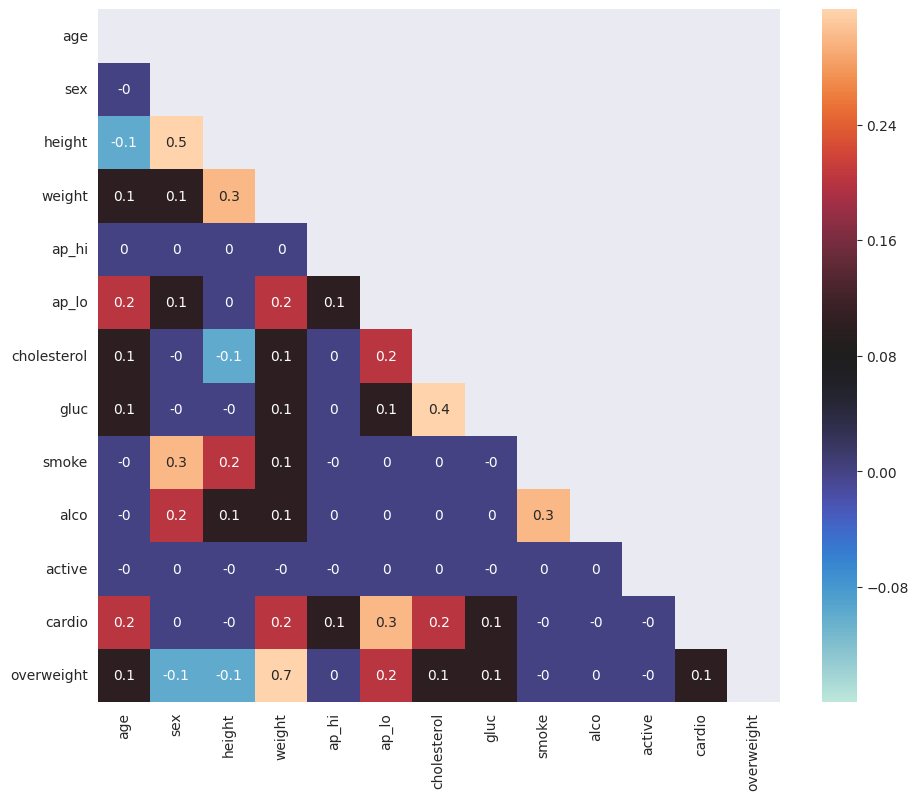

In [197]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df["height"] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df["weight"] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr().round(1)
    # Generate a mask for the upper triangle
    triangle = np.triu_indices(corr.shape[0])
    mask = np.full_like(corr, False)
    mask[triangle] = True
    # print(mask)


    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(data=corr, mask=mask, center=0.08, vmin=-0.16, vmax=0.32, cbar_kws={"ticks":[-0.08, 0, 0.08, 0.16, 0.24]}, annot=True)
    #
    #
    # # Do not modify the next two lines
    fig.savefig('heatmap.png')

draw_heat_map()